## Creating Neural Network to classify Iris Flowers

Note: Tensors are multi-dimensional arrays and are same as numpy arrays. Tensors have default data type of float34, and numpy arrays have default float64. Tensors are very useful as they work better on GPUs vs regular CPUs. More suitable for deep learning than numpy array.

Use **torch.tensor(numpyArray)** #To convert numpy array into tensor

Shortcut to run all cells, go to Runtime on top menu bar--->Run all

In [ ]:
import torch # import Pytorch
import torch.nn as nn #Torch has neural network library
import torch.nn.functional as F #Helps to move data fowards in our function (neural network)

In [ ]:
#Create model class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower, sequal length and width, petal length and width)
  # --->Hidden lyaer1 (number of neurons, e.g.4)
  # --->Hidden layer2(n)
  #---> output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    #hidden layers have 8 neurons, hidden layer 2 have 9 norosn and 3 output classes
    super().__init__() #insinatiate our nn.Module - using super constructor
    self.fc1 = nn.Linear(in_features,h1) #input=in_features, output layer=h1, fc1 means fully connected layer 1
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  #To push data forward from one layer to the next
  def forward(self,x):
    #relu is the activation function, y=x if x is more than 0
    #relu = rectified linear unit, if value is more than 0, use that value, otherwise say that value is 0 and continue
    #push function into every layer:
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


Other activation function: binary (poitive input guves 1 and negtive input gives 0), sigmoid (S curve), hyperbolic tangent\\

In [ ]:
#We want to start at a value then prodce random numbers, for this we can use seed - seed randomization
# For each layer we will use random numbers, in order for random numbers to be similar or the same as tutor's, we can use seed
#Pick a manual seed for randomisation:
torch.manual_seed(41) #Choose any random number, in this case 41
model = Model() #create the NN model
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

# Training

In [ ]:
import pandas as pd #To load data set
import matplotlib.pyplot as plt # Draw charts
#To draw chart inside notebook
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv' #Table values in csv format
my_df = pd.read_csv(url)#create dataframe
#dataframe has 150 rows (50 rows per class), 4 columns as 4 features and extra column for the class/ label
my_df #my_df.head() returns 1st 5 rows
#my_df.tail() returns the last 5 rows of the table


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
#Change last column to integer (as NN can only take number inputs and not strings)
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#Train Test Split - set X,y
#x are the features
X=my_df.drop('variety',axis=1) #axis due to pandas
#y is the target label
y=my_df['variety']



In [ ]:
#Convert dataframe into numpy arrays so that we can access the values like arrays, e.g. x1, x2, x3 and create the connections
X=X.values #use X, y by convention
y=y.values
#X

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#To split data into training data and testing data
#test_size is 20% (30/150, therefore 10 per class) of data and 80% training (120/150, therefore 40 per class)
#random state needed for which rows are selected per class, e.g. row 1, 3, 7, 9 etc for class 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41) # testing y is only for double-checking if our model is working correctly


In [ ]:
#Convert X features (numpy arrays) into tensors
# All the x values are floats, tehrefore use float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
#Using tensors makes it faster for GPU use

In [ ]:
#Convert y labels to tensors long, long represent 64 bit integers
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#Set the criterion of the model to measure the error, how far of we are from actual class - loss function definition
criterion=nn.CrossEntropyLoss()
#Choose Adam Optimisor, lr = learning rate(if error does not go down after multiple iterations(epochs) - then lower learning rate manually)
#optimisor - optimises the parameters.
#If the model gets stuck when learning, then use momentum to change the learning rate
#Start at lr=0.01 then keep increasing, higher - faster the learning
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
#more data, can take lot longer to learn with lower lr
#epoch=iteration, one iteration is when you pass in all 120 input data and the output classes, and calcuate the erros
#Repeat epochs but change the weigths every time, hopefully the erros should decreases but not always
#Loss function only calculates the error
#Using backptogation we change the weights using algotihms like calculus
#model.parameters
print(list(model.parameters()))


[Parameter containing:
tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
        [-0.2350,  0.2720, -0.3718,  0.2452],
        [ 0.3045,  0.1357,  0.0896,  0.1933],
        [ 0.3782,  0.0407, -0.3600,  0.4613],
        [ 0.3666, -0.0116, -0.2923, -0.1937],
        [-0.4415,  0.3314, -0.0434,  0.3445],
        [ 0.1883, -0.0992, -0.3197,  0.1740],
        [-0.3208, -0.1111,  0.2972, -0.2723]], requires_grad=True), Parameter containing:
tensor([-0.0245, -0.0679,  0.0573,  0.4814,  0.2923, -0.1877,  0.4425, -0.1626],
       requires_grad=True), Parameter containing:
tensor([[ 0.1456,  0.1463, -0.0107, -0.3290,  0.3324, -0.0817,  0.2408, -0.2121],
        [-0.0361,  0.3031, -0.3068,  0.0136, -0.0046, -0.3022, -0.0685, -0.3241],
        [ 0.0764,  0.0595,  0.2023,  0.0088, -0.1424, -0.1275, -0.1320,  0.2750],
        [ 0.1133, -0.3520,  0.0632, -0.0472,  0.2579, -0.1034,  0.3086,  0.1093],
        [-0.3185,  0.0744, -0.0807,  0.1770, -0.3035, -0.0259,  0.2337,  0.1253],
        [ 0.1664,  0.299

In [ ]:
#Train our model
# Number of Epochs (1 epoch=1 run through all the training data in our network
epochs=100 # if 100 does not work, we can increase it or decrease it. Overfitting vs not working
#We want our loss to decrease so that the network is working
#We will append our losses to a list as the training goes on
losses=[]
for i in range(epochs):
  #Go forward and get a prediction
  #Get output class prediction (y_pred), e.g. Setosa (0), (1) or (2)
  y_pred = model.forward(X_train) # Pass training data into the model, passing the 4 features data and get predicted result

  #Measure the loss/error, it is going to be high at first using criterion
  loss = criterion(y_pred, y_train) # precicted value vs the y_train

  #Keep track of our losses, helps to determine if the model is working correctly or not, is it improving/ learning
  #loss is a tensor, therefore convert it into a number using loss.detach().numpy()
  losses.append(loss.detach().numpy()) # Later, we will plot the losses to see the mdoel's improvement

  #print every 10 epoch to see the data, what is happening
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #Improving the model
  #Do some back propogation: take the error rate of forward propogation calculated and feed it back
  # through the netowrk to fine tune the weights, therefore it learns better
  optimizer.zero_grad() #function, zero_gradient for differentiation? - backpropogation algorithm
  loss.backward() #function - backpropogation algorithm
  optimizer.step() # Step foward into the model every time


Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'Epoch')

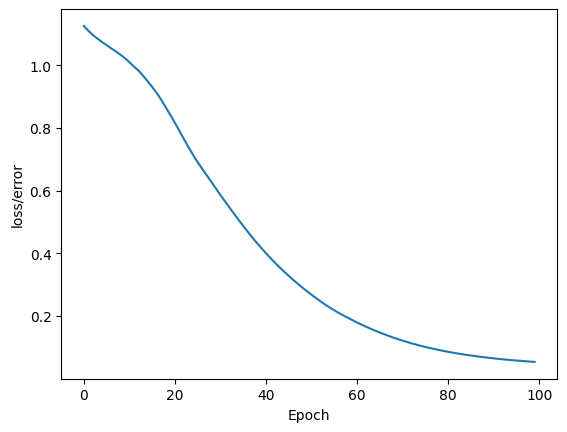

In [ ]:
#The losses keep decreasing and more less, e.g. steep in the beginning and flattens out
#After 60-70, we flatten out and get closer to 0
#If we do not see the error rate flatten out, we can maybe change our learning rate or increases our epochs
#If we change our number of epochs to 200, the error rate still starts to flatten out at around 60 epochs, therefore 200 is not needed
#Lets see it in a graph:
plt.plot(range(epochs), losses) #Number of epochs vs that iteration's loss
plt.ylabel("loss/error")
plt.xlabel('Epoch')
#As we can see our graph flattens out towrads 0, the model is learning, therefore training complete

If trainng data consists of both good (data is similar to each other) and  bad data (different to each other), then good test data, will giev high performance. Bad test data gives low performance, as model will work correctly but the test data's class labels will not match?

Low performance:
*   good training data and bad test data
*   bad training data and good test data

Therefore, only high operfromace, if training data is similar to test data

# Testing

In [ ]:
#Evaluate test data set (validate model on test set)
#We will be working with the 20% of the 150 data rows, 30 rows
#Create loop
with torch.no_grad(): #turn off back propogation,we do not need back propogation and modify the weights, when we pass through the test data into our model
  #X_test are the features from our test set, y_eval will be our class predictions
  y_eval = model.forward(X_test) #we want to sent the X test data forward thorugh our model, using the model's forward funtion using relu()
  loss = criterion(y_eval, y_test) #Find the loss or error, so finding the loss between our class prediction using the model vs the orginial test data's class


In [ ]:
loss #Not good, we want loss to be closer or almost the same to the loss we calculated above at epoch 90
#Only if the numbers are close, we can get all or almost all of our predictiosn to be correct (match the y_test data)

tensor(0.1315)

In [ ]:
#We want to see out of the 30 rows, which ones we predicted the class corretly
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test): #enumerate through X_test features, i will keep track of count, data will be the X test data
    y_val = model.forward(data)

    #Printing the name of class rather than number, so it is easier
    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    #To print out so that we can see what is happening, print out y_val but it is a tensor data type therefore, convert it to string before printing
    #Will tell us what type of flower class our network thinks it is, and we can compare it with the actual class from y_test data
    #\t represents tab
    #x is string/name version of y_test[i]
    print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item() == y_test[i]: #Compares prediction with actaut y_test data
      correct +=1 #Increment crrect so we can find out how many predictions we got were correct

print(f'We got {correct} correct')
#Output:
#Gives us three values
#Column 0 presents Sentosa, Clomn 1 represens VErsicolor and column 2 represnts Virginica
#For row 1, the network think that the class is Virginica, as 11 is the highest out of teh three values
#Whichever value is the highest, that represents the predicted class

#Row 16 and 18 predictions are incorrect
#If yoou change your random seed to a number closer to 30, e.g. 32, then you can get all of your prediction to be correct, getting 30 correct
#Why is this? - Is it not random?

1.) tensor([-5.8771,  4.4629,  6.5155]) 	 Virginica 	 2
2.) tensor([-7.5451,  4.1668,  9.7293]) 	 Virginica 	 2
3.) tensor([-8.4517,  5.1275, 10.2015]) 	 Virginica 	 2
4.) tensor([-4.3411,  5.6280,  2.5636]) 	 Versicolor 	 1
5.) tensor([-7.1838,  4.8757,  8.3023]) 	 Virginica 	 2
6.) tensor([-3.3940,  5.3421,  1.2802]) 	 Versicolor 	 1
7.) tensor([-5.9240,  4.9826,  6.0025]) 	 Virginica 	 2
8.) tensor([-4.2895,  5.7016,  2.3920]) 	 Versicolor 	 1
9.) tensor([-6.5369,  4.9261,  7.1291]) 	 Virginica 	 2
10.) tensor([-8.0526,  4.4129, 10.3325]) 	 Virginica 	 2
11.) tensor([-5.6775,  4.9505,  5.6248]) 	 Virginica 	 2
12.) tensor([ 4.5748, -2.2579, -2.8925]) 	 Setosa 	 0
13.) tensor([ 4.2646, -2.0055, -2.7342]) 	 Setosa 	 0
14.) tensor([-2.1081,  4.0482,  0.5803]) 	 Versicolor 	 1
15.) tensor([ 3.4608, -1.2147, -2.3488]) 	 Setosa 	 0
16.) tensor([-5.4739,  5.1174,  5.0966]) 	 Virginica 	 1
17.) tensor([ 4.0637, -1.8045, -2.6504]) 	 Setosa 	 0
18.) tensor([-5.8090,  4.6057,  6.2494]) 	 Versi

The model is pretty good/ ok as we got 28 predictions correct out of the 30.

# Evalute with New Data

In [ ]:
#We want to predict a new flower's class using its features
#This is assuming we already know the data points (featire values) rather than converting an input image into its feature values

#Create new data point
new_iris = torch.tensor([4.7, 3.2,1.7,0.2]) #The 4 features values as input


In [ ]:
#Same process as test data, we need to pass the unkown data through the network and get a predicted class as output
with torch.no_grad():
  print(model(new_iris)) #Run the model with the new data

tensor([ 3.9783, -1.7317, -2.6085])


Therefore, as 3.9783 is the biggest number out of the three numbers, the predicted class is Setosa

In [ ]:
#Lets test with a known data point
newer_iris = torch.tensor([5.9,3.0,5.1,1.8]) # We know this is class 2, Virginica (using row 149)

with torch.no_grad():
  print(model(newer_iris)) #Run the model with the new data



tensor([-5.9960,  4.5080,  6.6831])


As the largest number is 6.6831, therefore predicted class is 2.0, which is Virginica, therefore correct.

In [ ]:
#To convert the tensor to name of class/ name of iris
#model(newer_iris).argmax().item() - gets the largest value from the tensor list?
if model(newer_iris).argmax().item() == 0:
  x = "Setosa"
elif model(newer_iris).argmax().item() == 1:
  x = 'Versicolor'
else:
  x = 'Virginica'

print("The predicted class is:", x)



The predicted class is: Virginica


# Save and load our model

In [ ]:
#Save our NN model, and load the model to use later
#'my_iris_model' is the name of our model
torch.save(model.state_dict(), 'my_iris_model.pt') #Saves our weights and biases of our trained model into a dictionary, saves it onto our Google Collab unit

In [ ]:
#To load the model
new_model = Model() #Create new model and load our saved data of weights and biases of our trained model
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [ ]:
#Make sure the model loaded correctly
new_model.eval() # Wherever we use model, just replace with new model in our testing code, to work with a new model - easy to re-use

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)